In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as RS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [40]:
phi_tetra=np.arccos(-1/3)
ex=[RS.ExpSys(v0H=600,Nucs=['13C','1H'],vr=0,pwdavg=RS.PowderAvg('alpha0beta0'))]
# ex[0].set_inter('dipole',i0=0,i1=1,delta=RS.Tools.dipole_coupling(.11,'1H','13C'))
ex[0].set_inter('dipole',i0=0,i1=1,delta=RS.Tools.dipole_coupling(.2,'1H','1H'),euler=[0,-np.pi/4,0])
for k in range(3):
    ex.append(ex[0].copy())
#     ex[-1].set_inter('dipole',i0=0,i1=1,delta=RS.Tools.dipole_coupling(.11,'1H','13C'),euler=[0,phi_tetra,2*k*np.pi/3])
    ex[-1].set_inter('dipole',i0=0,i1=1,delta=RS.Tools.dipole_coupling(.2,'1H','1H'),
                     euler=[[0,phi_tetra,2*k*np.pi/3],[0,-np.pi/4,0]])

L=RS.Liouvillian(ex)
L.kex=RS.Tools.fourSite_sym(tc=1e-9)

<IPython.core.display.Javascript object>


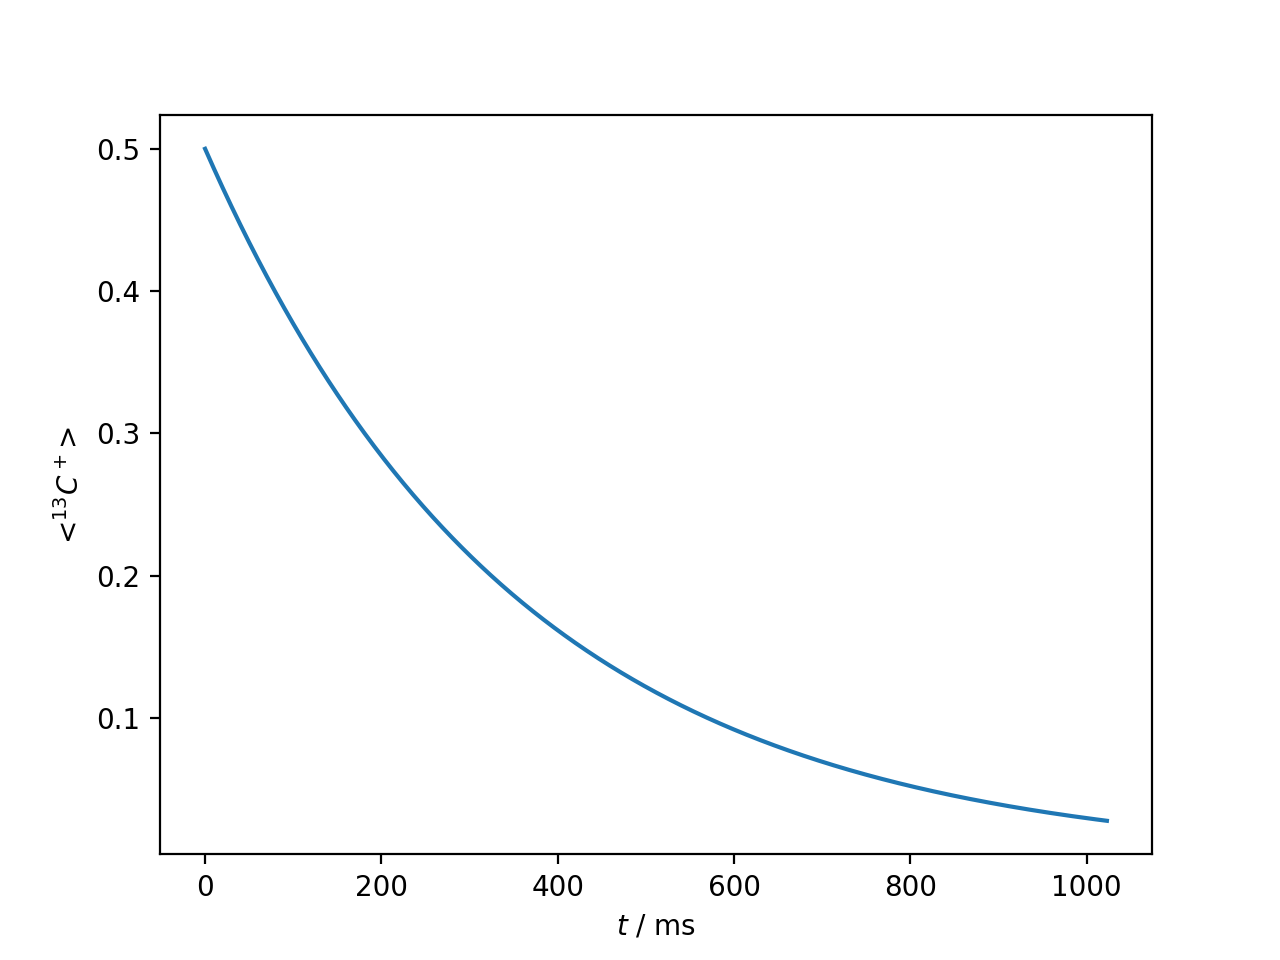

<IPython.core.display.Javascript object>


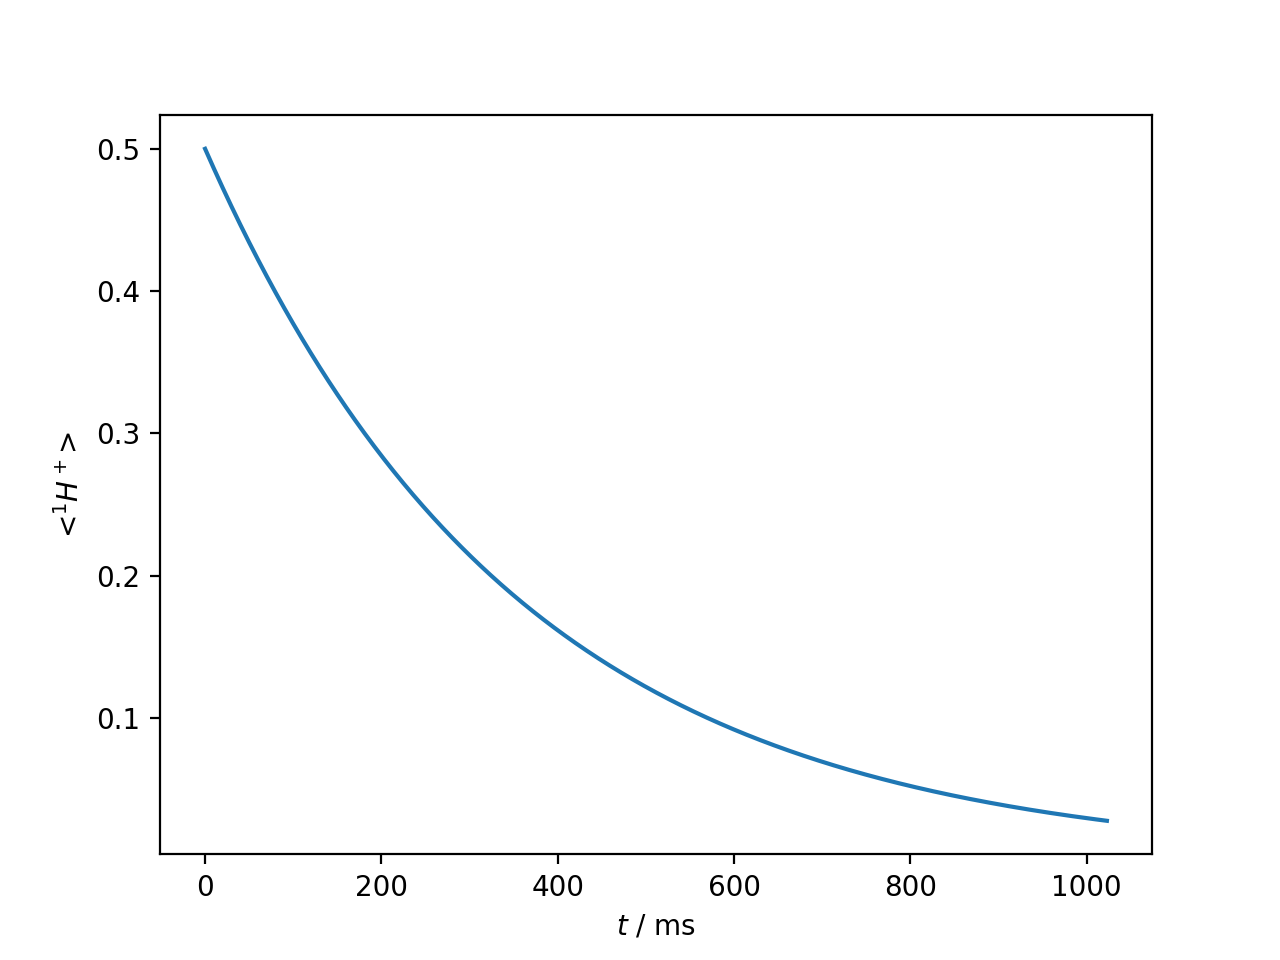

<AxesSubplot:xlabel='$t$ / ms', ylabel='<$^{1}H^+$>'>

In [41]:
U=L.U(Dt=.001)
rho=RS.Rho(rho0='13Cx',detect='13Cp')
rho.DetProp(U,n=1024)
rho.plot()

rho=RS.Rho(rho0='1Hx',detect='1Hp')
rho.DetProp(U,n=1024)
rho.plot()

(256, 256)